In [1]:
import tensorflow as tf
import pandas as pd                                         # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                          # linear algebra
from tensorflow.keras.models import Sequential              # model type
from tensorflow.keras.layers import Dense, Dropout          # dense layer, dropout layer
from tensorflow.keras.activations import relu, sigmoid      # activation functions
from tensorflow.keras.optimizers import SGD                 # stochastic gradient descent
from tensorflow.keras.losses import binary_crossentropy    # loss function

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv', nrows=1000000)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,45,PAYMENT,10913.42,C1384914558,576108.80,565195.38,M166797080,0.0,0.0,0,0
999996,45,PAYMENT,2014.46,C1207593845,565195.38,563180.92,M1027899613,0.0,0.0,0,0
999997,45,PAYMENT,18839.45,C260638437,563180.92,544341.47,M243388883,0.0,0.0,0,0
999998,45,PAYMENT,17890.19,C439661237,544341.47,526451.29,M66034502,0.0,0.0,0,0


In [3]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
998513,45,CASH_OUT,357836.57,C198543509,357836.57,0.0,C824285986,51217.85,409054.43,1,0
999221,45,TRANSFER,155761.29,C280136890,155761.29,0.0,C927108992,0.00,0.00,1,0
999222,45,CASH_OUT,155761.29,C719370249,155761.29,0.0,C2024978323,192775.45,348536.74,1,0
999453,45,TRANSFER,7335355.57,C1102672587,7335355.57,0.0,C735323689,0.00,0.00,1,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.nunique()

step                  45
type                   5
amount            966178
nameOrig          999759
oldbalanceOrg     399781
newbalanceOrig    441680
nameDest          422896
oldbalanceDest    581956
newbalanceDest    423747
isFraud                2
isFlaggedFraud         1
dtype: int64

In [6]:
df.drop(columns=[
    'step',
    'nameOrig',
    'nameDest',
    'isFlaggedFraud',
], inplace=True)

In [7]:
cat_columns = df.select_dtypes(include='object').columns
cat_columns

Index(['type'], dtype='object')

In [8]:
num_columns = df.select_dtypes(include=np.number).columns
df[num_columns]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.0,0.0,0
1,1864.28,21249.00,19384.72,0.0,0.0,0
2,181.00,181.00,0.00,0.0,0.0,1
3,181.00,181.00,0.00,21182.0,0.0,1
4,11668.14,41554.00,29885.86,0.0,0.0,0
...,...,...,...,...,...,...
999995,10913.42,576108.80,565195.38,0.0,0.0,0
999996,2014.46,565195.38,563180.92,0.0,0.0,0
999997,18839.45,563180.92,544341.47,0.0,0.0,0
999998,17890.19,544341.47,526451.29,0.0,0.0,0


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [10]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']
smote = SMOTE()

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['type']),
        ('num', StandardScaler(), num_columns[:-2])
    ])

p = Pipeline(steps=[('preprocessor', preprocessor)])

In [12]:
Xp = p.fit_transform(X)
Xp.shape

(1000000, 8)

In [13]:
Xp, y = smote.fit_resample(Xp, y)
Xp.shape, y.shape

((1998930, 8), (1998930,))

In [14]:
model = Sequential()
model.add(Dense(units=64, activation=relu, input_shape=(Xp.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation=sigmoid))

In [15]:
model.compile(
    optimizer=SGD(),
    loss=binary_crossentropy,
    metrics=['accuracy', 'Precision', 'Recall']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        


                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1599144, 8), (399786, 8), (1599144,), (399786,))

In [17]:
model.fit(X_train, y_train,
        epochs=10, batch_size=32, 
        validation_split=0.2,
        verbose=1, shuffle=True)

c:\Users\ACER\miniconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
39979/39979 [==============================] - 272s 7ms/step - loss: 0.2676 - accuracy: 0.8783 - precision: 0.8636 - recall: 0.8985 - val_loss: 0.1952 - val_accuracy: 0.9164 - val_precision: 0.9075 - val_recall: 0.9273
Epoch 2/10
39979/39979 [==============================] - 301s 8ms/step - loss: 0.1842 - accuracy: 0.9219 - precision: 0.9157 - recall: 0.9293 - val_loss: 0.1643 - val_accuracy: 0.9304 - val_precision: 0.9239 - val_recall: 0.9381
Epoch 3/10
39979/39979 [==============================] - 413s 10ms/step - loss: 0.1660 - accuracy: 0.9343 - precision: 0.9248 - recall: 0.9455 - val_loss: 0.1550 - val_accuracy: 0.9377 - val_precision: 0.9358 - val_recall: 0.9400
Epoch 4/10
39979/39979 [==============================] - 369s 9ms/step - loss: 0.1574 - accuracy: 0.9412 - precision: 0.9277 - recall: 0.9569 - val_loss: 0.1476 - val_accuracy: 0.9485 - val_precision: 0.9323 - val_recall: 0.9671
Epoch 5/10
39979/39979 [==============================] - 277s 7ms/step - loss:

In [18]:
model.evaluate(X_test, y_test)

12494/12494 [==============================] - 71s 6ms/step - loss: 0.1301 - accuracy: 0.9525 - precision: 0.9381 - recall: 0.9690


[0.13008448481559753,
 0.9525346159934998,
 0.9381397366523743,
 0.9690360426902771]

In [19]:
model.save('ann_fraud_detection.h5')

12494/12494 [==============================] - 84s 7ms/step


<AxesSubplot: >

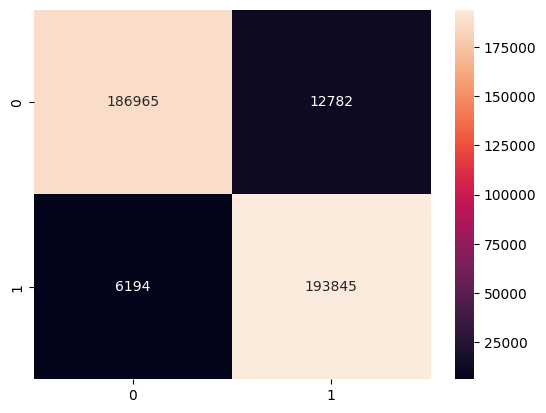

In [20]:
import seaborn as sns
# heatmap
ypred = model.predict(X_test)
ypred = ypred > 0.5
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')

In [21]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95    199747
           1       0.94      0.97      0.95    200039

    accuracy                           0.95    399786
   macro avg       0.95      0.95      0.95    399786
weighted avg       0.95      0.95      0.95    399786



In [22]:
from joblib import dump
model.save('ann_fraud_detection.h5')
dump(p, 'ann_fraud_detection_preprocessor.jb')

['ann_fraud_detection_preprocessor.jb']

In [23]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.0
2,TRANSFER,181.00,181.00,0.00,0.0,0.0
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.0
...,...,...,...,...,...,...
999995,PAYMENT,10913.42,576108.80,565195.38,0.0,0.0
999996,PAYMENT,2014.46,565195.38,563180.92,0.0,0.0
999997,PAYMENT,18839.45,563180.92,544341.47,0.0,0.0
999998,PAYMENT,17890.19,544341.47,526451.29,0.0,0.0


In [24]:
from joblib import load
def load_model():
    model = tf.keras.models.load_model('ann_fraud_detection.h5')
    return model

def load_preprocessor():
    p = load('ann_fraud_detection_preprocessor.jb')
    return p

In [25]:
existing_model = load_model()
p = load_preprocessor()
# existing_model.summary()

In [26]:
def predict_fraud(model, data):

    data = p.transform(data)
    prediction = model.predict(data)
    return {
        'prediction': prediction[0][0] > 0.5,
        'confidence': prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    }

In [27]:
data = pd.DataFrame({
    'type': ['CASH_OUT'],
    'amount': [21000],
    'oldbalanceOrg': [21000],
    'newbalanceOrig': [2],
    'oldbalanceDest': [0],
    'newbalanceDest': [1],
})

out = predict_fraud(existing_model, data)
print(out)
   

1/1 [==============================] - 0s 254ms/step
{'prediction': True, 'confidence': 88.61895799636841}


In [28]:
df.describe().loc[['min','max']]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
min,0.1,0.00,0.00,0.00,0.00,0.0
max,10000000.0,38939424.03,38946233.02,42054659.73,42169156.09,1.0


In [29]:
# all fraud transactions
df[df['isFraud']==1]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
251,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1
252,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1
680,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...
998513,CASH_OUT,357836.57,357836.57,0.0,51217.85,409054.43,1
999221,TRANSFER,155761.29,155761.29,0.0,0.00,0.00,1
999222,CASH_OUT,155761.29,155761.29,0.0,192775.45,348536.74,1
999453,TRANSFER,7335355.57,7335355.57,0.0,0.00,0.00,1


In [30]:
df[df['isFraud']==0]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.0,0
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.0,0
5,PAYMENT,7817.71,53860.00,46042.29,0.0,0.0,0
6,PAYMENT,7107.77,183195.00,176087.23,0.0,0.0,0
...,...,...,...,...,...,...,...
999995,PAYMENT,10913.42,576108.80,565195.38,0.0,0.0,0
999996,PAYMENT,2014.46,565195.38,563180.92,0.0,0.0,0
999997,PAYMENT,18839.45,563180.92,544341.47,0.0,0.0,0
999998,PAYMENT,17890.19,544341.47,526451.29,0.0,0.0,0
